<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Bv-beta-distribution/bibeta_conv_sink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Beta Model

Notebook for the convergence of the Sinkhorn divergence

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Define saving path (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

### Imports

In [ ]:
import numpy as np

### Sinkhorn divergence convergence

Calculate Inkhorn divergence for fixed $d=2$ and varying $n$:

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]       # number of simulated samples - powers of 2
m = 2**15                               # number of true samples
num = 25                                # numbers of repetitions for MC and RQMC
theta = (1.5,1.5,1.5,1.5,1.5)                     # true theta
d = 2                                   # data dimensions
e = 5*d                                 # parameter for Sinkhorn divergence
method = 'sinkhorn_stabilized'          # 'sinkhorn' or 'sinkhorn_stabilized' or 'sinkhorn_epsilon_scaling'
cost = 'sqeuclidean'                     # 'euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’

Define QMC sequence:

In [ ]:
i_theta,_ = divmod(theta,np.ones(5)) 
i_theta.astype(int)
qmc = qmcpy.Halton(np.sum(i_theta.astype(int)),seed=7)

Calculate Sinkhorn divergence for varying $n$:

In [ ]:
sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv('bibeta',n,num,d,e,theta,method=method,cost=cost)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the Sinkhorn divergence against $n$:

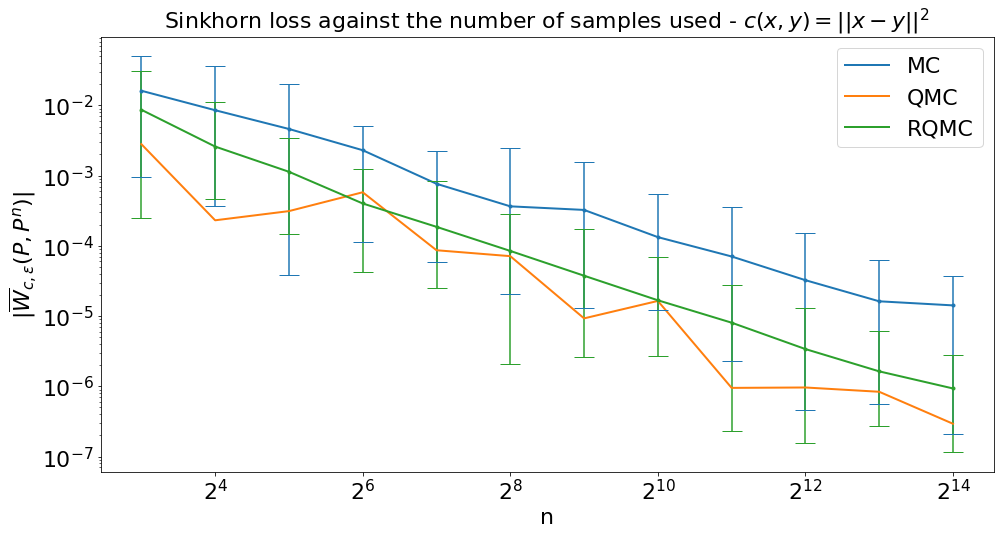

In [ ]:
plot_sink_conv(2,(16,8),sink_mc,sink_qmc,sink_rqmc,'MC','QMC','RQMC',sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc)

In [ ]:
#np.savez(path+"bibeta_sink_n_%s_int.npz" %cost, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)
np.savez(path+"bibeta_sink_n_%s_noint.npz" %cost, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)